## Labo Week 5 : Lineaire Modellen en Decision Trees

### **Oefening 1** : **Binaire Classificatie - cijfers data**

De taak is om op basis van 2 examenresultaten van studenten te gaan voorspellen of ze toegelaten zullen worden om in te schrijven voor een bepaalde cursus. 

**1.1** Lees de txt file : cijfers.txt in via pandas. Zorg ervoor dat je tabel de volgende kolomhoofden heeft : 'Examen1', 'Examen2', 'Toegelaten'. 

In [1]:
import pandas as pd
cijferData = pd.read_csv('cijfers.txt', names= ['Examen1','Examen2','Toegelaten'])
#cijferData.rename(columns = {'34.62365962451697':'Examen1', '78.0246928153624':'Examen2','0':'Toegelaten'}, inplace = True)
cijferData

,Examen1,Examen2,Toegelaten
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


**1.2** Visualiseer deze data door een scatterplot te maken van de aanwezige data. Geef elke klasse een andere kleur. Feature 1= 'Examen1' plaats je op de x-as, Feature 2 = 'Examen 2' plaats je op de y-as.

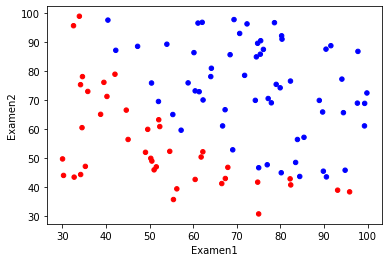

In [2]:
colors = {0:'red',1:'blue'}
ax1 = cijferData.plot.scatter(x = 'Examen1', y= 'Examen2', c = cijferData['Toegelaten'].map(colors))

**1.3** Stel enerzijds een model op via LogisticRegression, anderzijds via een DecisionTreeClassifier. Splits je data telkens in een trainings en testset ($25\%$ van de data hou je om de testen). Plot de  **decision boundary** die je bekomt bovenop je scatterplot.

1)Je lineair model zal 2 coëfficienten weergeven ($a_1$ en $a_2$ want er zijn 2 features aanwezig) en een intercept($a_0$). Deze kan je opvragen via  

```
model.coef_[0]
model.intercept_[0]
```

De vergelijking van je decision boundary verkrijg je als volgt :

\begin{equation}
0 = a_0 + a_1 * x_1 + a_2x_2 \\
x_2 = - \frac{a_0 + a_1 * x_1}{a_2}\\
\end{equation}
$x_2$ stelt feature 2 voor en bevindt zich op de y-as, $x_1$ stelt feature 1 voor en bevindt zich op de x-as, dus de vergelijking van de rechte heeft volgende vorm : 
\begin{equation} 
y  =  - \frac{a_0 + a_1 * x}{a_2}
\end{equation}

2)De decision boundary van je beslissingsboom kan je als volgt bepalen : doe een voorspelling voor elke (x,y) coördinaat van een grid die de volledige grafiek bedekt. 
Deze grid kan je genereren met de  $𝑛𝑝.𝑚𝑔𝑟𝑖𝑑()$  functie als volgt :

```
grid = np.mgrid[30:100,20:100].reshape(2,-1).T
```

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

features = ['Examen1','Examen2']
#print(cijferData.loc[:,features])

X_train, X_test, y_train, y_test = train_test_split(cijferData.loc[:,features], cijferData['Toegelaten'], test_size= 0.25)

lr = LogisticRegression(C = 5, solver= 'liblinear', multi_class= 'auto').fit(X_train,y_train)

In [4]:
"""
coef_array of shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem.
If multiple targets are passed during the fit (y 2D), 
this is a 2D array of shape (n_targets, n_features), 
while if only one target is passed, this is a 1D array of length n_features.
"""
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

"""
interrcept geeft het startpunt van de lijn bij x = 0(punt waar hij de y -as kruist)

"""

lr.coef_: [[0.06408953 0.063871  ]]
lr.intercept_: [-8.05117546]


'\ninterrcept geeft het startpunt van de lijn bij x = 0(punt waar hij de y -as kruist)\n\n'

In [5]:
a0 = lr.intercept_
a1 = lr.coef_[0][0]
a2 = lr.coef_[0][1]


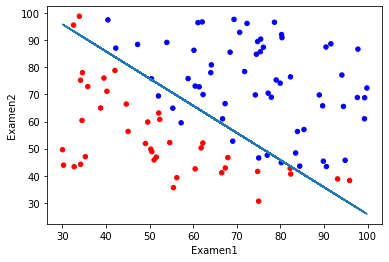

In [6]:
###
x = cijferData.Examen1
y = -((a0 + (a1 * x )) / a2)


ax1 = cijferData.plot.scatter(x = 'Examen1', y= 'Examen2', c = cijferData['Toegelaten'].map(colors))
plt.plot(x,y)
plt.show()

**1.4** Varieer de parameters van beide modellen en bekijk de wijzigingen visueel via de decision boundaries.

1)Voor het lineair model de varieer de $C$ regularisatie parameter.

2)Voor de beslissingsboom, varieer de max_depth van waarden $k=1$ t.e.m. $k=7$. Kan je de decision boundaries die je bekomt verklaren?

* Om beide modellen te vergelijken : zie ROC_curve volgend labo

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_trainDecision, X_testDecision, y_trainDecision, y_testDecision = train_test_split(cijferData.loc[:,features], cijferData['Toegelaten'], test_size= 0.25)
cif = DecisionTreeClassifier(random_state=0 , max_depth= 3)
cif.fit(X_trainDecision,y_trainDecision)
print("Accuracy on training set: {:.3f}".format(cif.score(X_trainDecision, y_trainDecision)))
print("Accuracy on test set: {:.3f}".format(cif.score(X_testDecision, y_testDecision)))

Accuracy on training set: 0.947
Accuracy on test set: 0.920


In [8]:
grid = np.mgrid[30:100,20:100]
print(grid)
grid = grid.reshape(2,-1).T
print(grid)

[[[30 30 30 ... 30 30 30]
  [31 31 31 ... 31 31 31]
  [32 32 32 ... 32 32 32]
  ...
  [97 97 97 ... 97 97 97]
  [98 98 98 ... 98 98 98]
  [99 99 99 ... 99 99 99]]

 [[20 21 22 ... 97 98 99]
  [20 21 22 ... 97 98 99]
  [20 21 22 ... 97 98 99]
  ...
  [20 21 22 ... 97 98 99]
  [20 21 22 ... 97 98 99]
  [20 21 22 ... 97 98 99]]]
[[30 20]
 [30 21]
 [30 22]
 ...
 [99 97]
 [99 98]
 [99 99]]


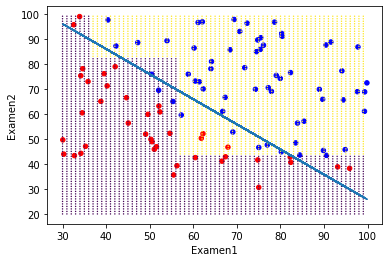

In [9]:
predictor = cif.predict(grid)
##33
#fig, ax  = plt.subplots(figsize = (12,0))

ax1 = cijferData.plot.scatter(x = 'Examen1', y= 'Examen2', c = cijferData['Toegelaten'].map(colors))
plt.plot(x,y)
plt.scatter(grid[:,0], grid[:,1], c=predictor, edgecolors='none', s=2)
plt.show()

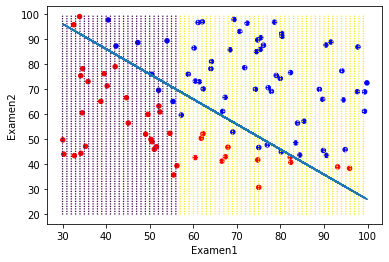

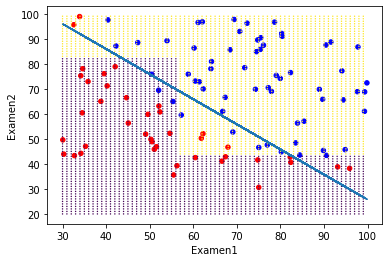

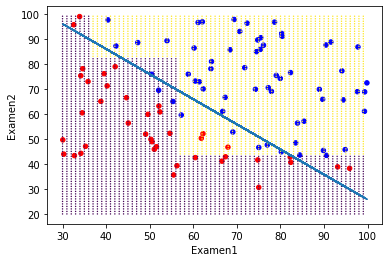

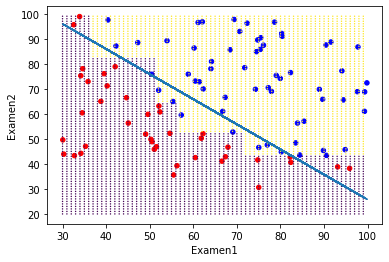

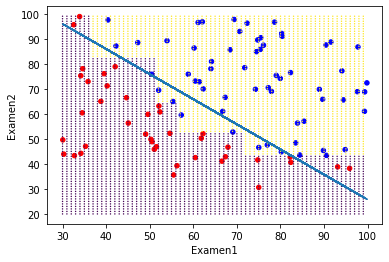

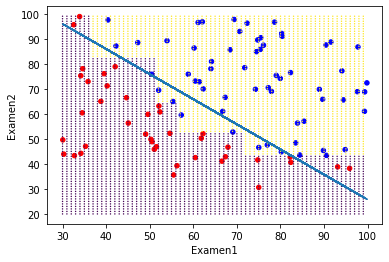

In [10]:
for i in range(1,7):
    dtf = DecisionTreeClassifier(random_state= 0, max_depth=i)
    dtf.fit(X_trainDecision,y_trainDecision)

    predictor = dtf.predict(grid)
    ####
    #plt.scatter(positef_test['Examen1], positief_test['Examen2], s =50, c = 'b' , marker = 'o' , label ='Admitted')
    #plt.scatter(negatief_test['Examen1], negatief_test['Examen2], s =50, c = 'r' , marker = 'x' , label ='Admitted')
    #plt.scatter(grid[:0],grid[:,1],c = predictor ,edgecolors = 'none' , s= 2)
    ax1 = cijferData.plot.scatter(x = 'Examen1', y= 'Examen2', c = cijferData['Toegelaten'].map(colors))
    plt.plot(x,y)
    plt.scatter(grid[:,0], grid[:,1], c=predictor, edgecolors='none', s=2)
    plt.show()

### **Oefening 2** : **Classificatie - housing-data**

**2.1 De data verkennen**

Gegeven de dataset van housing.csv. Deze dataset kan worden gebruikt om te voorspellen of een appartement in New York gelegen is of in San Fransisco. Het bestand bevat volgende kolommen:
 * in_sf: het te voorspellen target: staat op 1 indien het appartement in San Francisco gelegen is
 * beds: het aantal bedden
 * bath: het aantal baden
 * price: de verkoopprijs (\$)
 * year_built: het bouwjaar
 * sqft: de oppervlakte in square foot
 * price_per_sqft: de prijs (\$) per square foot
 * elevation: hoogte in m

1. Laad de data in in een Pandas-dataframe (gelieve niks te veranderen aan het csv-bestand, tip: skip de eerste 2 rijen) en maak een scatter_matrix-plot van de __features__ waarbij elke instanties steeds ingekleurd wordt volgens zijn target (met colormap 'brg' wordt San Francisco groen en New York blauw)
 
2. Teken met Pandas (groupby en hist(alpha=0.4)) een histogram (met verschillende kleur voor SF en NY) voor een aantal features waarvan je verwacht dat de spreiding voor de 2 steden sterk verschilt.
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   in_sf           492 non-null    int64  
 1   beds            492 non-null    float64
 2   bath            492 non-null    float64
 3   price           492 non-null    int64  
 4   year_built      492 non-null    int64  
 5   sqft            492 non-null    int64  
 6   price_per_sqft  492 non-null    int64  
 7   elevation       492 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 30.9 KB


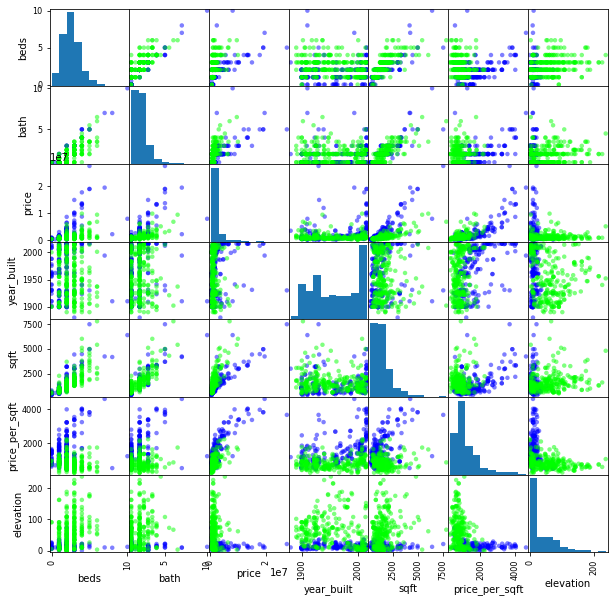

In [11]:
housingData = pd.read_csv('housing.csv' , skiprows= 2)
housingData.info()
pd.plotting.scatter_matrix(housingData.iloc[:,1:], c = housingData['in_sf'] ,figsize= (10,10), marker = 'o', s = 20, cmap = 'brg')
plt.show()

in_sf
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: elevation, dtype: object

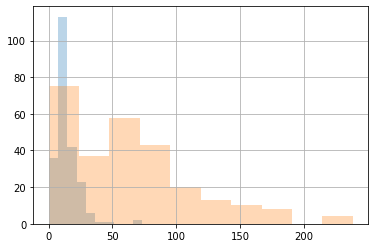

In [12]:
housingData.groupby('in_sf').elevation.hist(alpha = 0.3)

in_sf
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

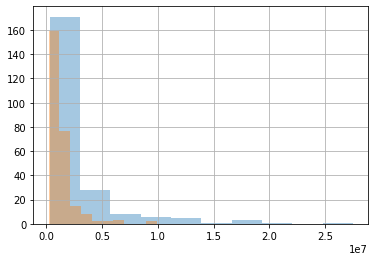

In [13]:
housingData.groupby('in_sf').price.hist(alpha = 0.4)

 
 
 #### **2.2 Plotten van de boom met ideale diepte**

 * Deel de data in in een trainingset en een test set (70%/30%) 
 * Schrijf een script dat de ideale diepte zoekt van de decision tree 
 * Plot de tree die je bekomt ofwel via `plot_tree` van matplotlib  
 

In [14]:
from sklearn import tree
X_trainDecision, X_testDecision, y_trainDecision, y_testDecision = train_test_split(housingData.iloc[:,1:], housingData['in_sf'], test_size= 0.3)

for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth= i)
    clf = clf.fit(X_trainDecision, y_trainDecision)

    #print("depth " + (str)(i) + " Accuracy on training set: {:3f}".format(clf.score(X_trainDecision,y_trainDecision)))
    #print("depth " + (str)(i) + " Accuracy on test set: {:3f}".format(clf.score(X_testDecision,y_testDecision)))



    

In [15]:
features = housingData.iloc[:,1:].columns
print(features)

Index(['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft',
       'elevation'],
      dtype='object')


In [16]:
clf = DecisionTreeClassifier(max_depth= 6)
clf = clf.fit(X_trainDecision, y_trainDecision)
print(clf.feature_importances_)

[0.01754448 0.         0.03028885 0.18814858 0.02229488 0.15624444
 0.58547877]


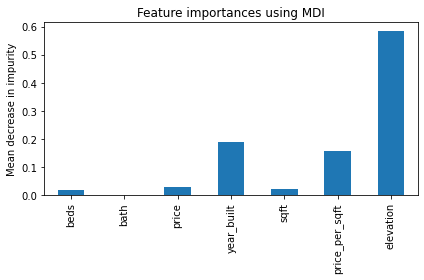

In [17]:
forest_importances = pd.Series(clf.feature_importances_, features)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Index(['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft',
       'elevation'],
      dtype='object')
['New york', 'San Fransisco']


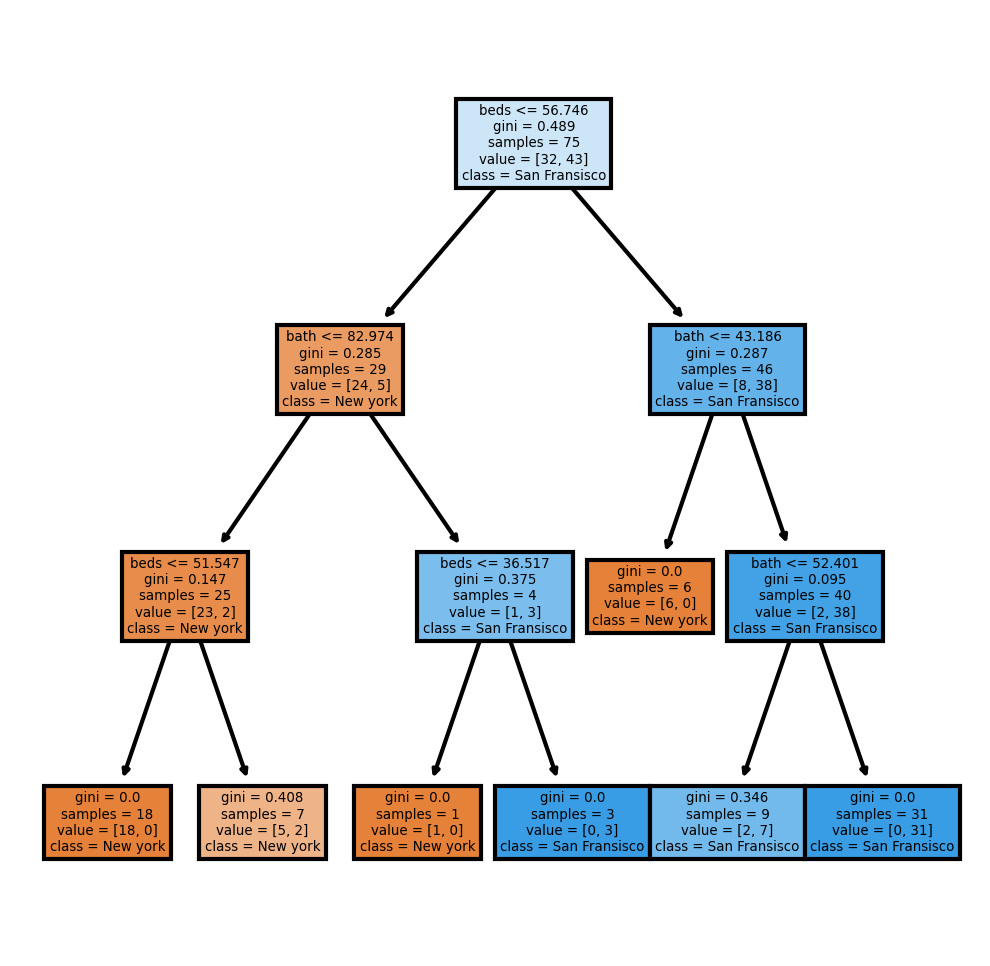

In [18]:
features = housingData.iloc[:,1:].columns
print(features)

target = ['New york', 'San Fransisco']
print(target)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(cif,
feature_names= features,
class_names= target,
filled= True)

fig.savefig('tree.png')

#### **2.3** : **Gridsearch in combinatie met cross-validatie**
    

**2.3.1** Gebruik  DecisionTreeClassifier() maar nu in combinatie met **Cross-validatie** om de performantie van je model beter in te schatten. Vertrek van de default ingestelde parameterwaarden.
Gebruik volgende import: 
```
from sklearn.model_selection import cross_val_score of
from sklearn.model_selection import cross_validate
```

**2.3.2** Herhaal deze oefening maar nu in combinatie met **Leave-one out Cross-validation**. Gebruik nu :
```
from sklearn.model_selection import LeaveOneOut
```

**2.3.3** Gebruik naast training en testset nu ook een **validatieset**. Gebruik GridSearch en CV in combinatie via **GridSearchCV** om zowel de ideale diepte van de boom als de randomstate te onderzoeken. $\newline$
Maak hierbij gebruik van $5$ folds en beide imports :
```
from sklearn.model_selection import GridSearchCV ## training & validatie
from sklearn.model_selection import train_test_split ## 1 test set maken
```

Vergelijk je bekomen resultaten telkens met de vorige behaalde resultaten. Vergelijk niet alleen op basis van gemiddelde train en test scores maar ook op basis van tijd. Gebruik hiertoe de resultaten uit de functie **cross\_validate** uit $sklearn.model\_selection$ of gewoon een timer functie uit : 
```
from time import perf_counter as time
```

**2.3.1 Standaard Cross-validation : cross\_val\_score en cross\_validate**

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(random_state= 0, max_depth= 5)
scores = cross_val_score(clf,housingData.iloc[:,1:], housingData.iloc[:,:1], cv= 3)
print("Cross-val-scores: {}".format(scores))

res = cross_validate(clf, housingData.iloc[:,1:], housingData.iloc[:,:1],  cv=5,
                     return_train_score=True)
print("Cross-validation scores: {}".format(res))


Cross-val-scores: [0.75       0.93902439 0.82926829]
Cross-validation scores: {'fit_time': array([0.00599909, 0.00799918, 0.00799823, 0.00900006, 0.00600243]), 'score_time': array([0.00200105, 0.00199914, 0.00300097, 0.00600338, 0.00600815]), 'test_score': array([0.81818182, 0.88888889, 0.95918367, 0.74489796, 0.81632653]), 'train_score': array([0.98727735, 0.93638677, 0.94670051, 0.96446701, 0.95939086])}


In [20]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.005999,0.002001,0.818182,0.987277
1,0.007999,0.001999,0.888889,0.936387
2,0.007998,0.003001,0.959184,0.946701
3,0.009000,0.006003,0.744898,0.964467
4,0.006002,0.006008,0.816327,0.959391


Mean times and scores:
 fit_time       0.007400
score_time     0.003803
test_score     0.845496
train_score    0.958844
dtype: float64


**2.3.2 Leave-one out**

In [21]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(clf,housingData.iloc[:,1:], housingData.iloc[:,:1], cv= cv)
#print("Cross-val-scores: {}".format(scores))
####
tree= DecisionTreeClassifier()
avg_acc = 0
X = housingData.iloc[:,1:]
y = housingData.iloc[:,:1]

for train_index , test_index in cv.split(X):
    X_trainDecision, X_testDecision = X.iloc[train_index,:], X.iloc[test_index,:]
    y_trainDecision,y_testDecision = y.iloc[train_index,:], y.iloc[test_index,:]
    model = tree.fit(X_trainDecision, y_trainDecision)
    predicted_y = model.predict(X_testDecision)
    avg_acc = model.score(X_testDecision,y_testDecision)
avg_acc = avg_acc / len(X)

print(avg_acc)

0.0020325203252032522


**2.3.3 GridSearchCV**

from sklearn.model_selection import train_test_split 

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


/////////////////////////////////////
from sklearn.tree import DecisionTreeClassifier

best_score = 0

# make a grid for parameter tuning
for depth in [1,2,3,4,5]:
    for rs in [0,5,10,20,40]:
    # for each combination of parameters train a decisiontree
        tree = DecisionTreeClassifier(max_depth=depth, random_state=rs)
        tree.fit(X_train, y_train)
        # evaluate for the validation set
        score = tree.score(X_valid, y_valid)
        # store the best scores
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': depth, 'random_state': rs}

print("Best parameters: ", best_parameters)
////////////////////

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
training_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)

print("Training set score with best parameters : {:.2f}".format(training_score))
print("Best score on validation set: {:.2f}".format(best_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

In [22]:
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
              'random_state': [0,5,10,20,40,50,60,70]}

print('param_grid:\n{}'.format(param_grid))

param_grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'random_state': [0, 5, 10, 20, 40, 50, 60, 70]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,
                            return_train_score=False)
X_train, X_test, y_train,y_test = train_test_split(housingData.iloc[:,1:], housingData.iloc[:,:1])
grid_search.fit(X_train,y_train)

print("Best Parameters: {}".format(grid_search.best_params_))
print("Best cross_validation score: {:2f}".format(grid_search.best_score_))
print("Best estimator: \n{}".format(grid_search.best_estimator_))
print("Test set score: {:2f}".format(grid_search.score(X_test,y_test)))


Best Parameters: {'max_depth': 6, 'random_state': 10}
Best cross_validation score: 0.897186
Best estimator: 
DecisionTreeClassifier(max_depth=6, random_state=10)
Test set score: 0.902439


**Oefening 3** : **Regressie - auto data**

Gegeven een uitgebreidere versie van de autoverbruikdata met extra features : auto_extra.txt. De taak blijft nog steeds om de target _miles_per_gallon_ ($mpg$) te voorspellen.

Uit de oorspronkelijke beschrijving van de data set :

 "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)
  Number of Instances: 398
  Number of Attributes: 9 including the class attribute
  Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

Lees de data in via volgend commando :

```
data = pd.read_table('auto_extra.txt', delim_whitespace=True)
```
**3.1** Inspecteer de data en merk op dat het type van de kolom _horsepower_ geen $float$ is zoals men zou verwachten. Waarom niet? Kan je dit herstellen?

In [24]:
data = pd.read_table('auto_extra.txt', delim_whitespace=True)
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [25]:
#https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_numeric.html
data["horsepower"] = pd.to_numeric(data["horsepower"],errors='coerce')
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


**3.2** Bereken de **correlatiematrix** van de features en ga op basis hiervan na welke features je zou meenemen.
Gebruik volgende tutorial om de correlatiematrix te berekenen en te plotten : <http://benalexkeen.com/correlation-in-python/>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
None


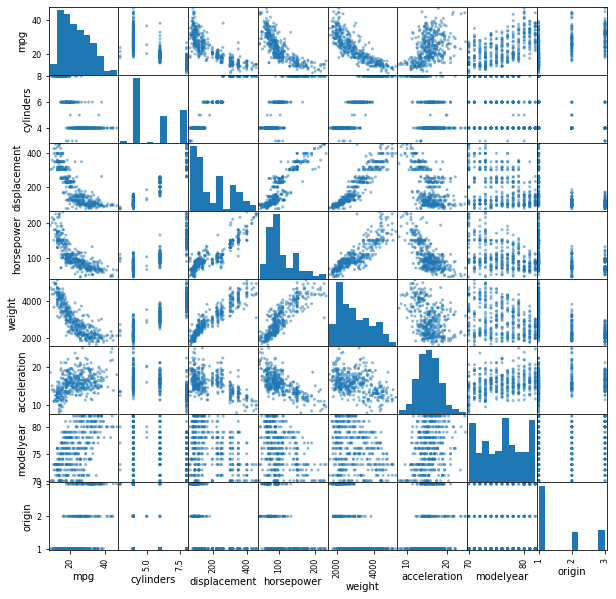

In [26]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
data = data.dropna()
print(data.info())

**3.3** Stel een regressiemodel op. Gebruik hierbij volgende features : "cylinders", "displacement", "horsepower", "weight" en "acceleration" . Test volgende algoritmen : 
- Lineair Regression, 
- Ridge, 
- Lasso, 
- Decision Trees en 
- Random Forest. 

Doe een grondige analyse van de parameters vooraleer je accuracy scores berekent en vergelijkt. Maak gebruik van cross_validatie.

In [27]:
#Make testmodel
from sklearn.model_selection import train_test_split
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, features], data['mpg'], test_size=0.25, random_state=42)

#Lineair Regression
print("lineair")
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#Ridge
print("\nridge")
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) # the default waarde alpha = 1.0 wordt hier gebruikt (hoe kleiner hoe meer het lijkt om lineair)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

#lasso
print("\nlasso")
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)  # the default waarde alpha = 1.0 wordt hier gebruikt
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

#Decision Trees
print("\nD trees")
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

#Random Forest
print("\nR forest")
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


lineair
Training set score: 0.72
Test set score: 0.66

ridge
Training set score: 0.72
Test set score: 0.66

lasso
Training set score: 0.72
Test set score: 0.66
Number of features used: 3

D trees
Accuracy on training set: 0.809
Accuracy on test set: 0.639

R forest
Accuracy on training set: 0.966
Accuracy on test set: 0.700


**3.4** Gebruik je modellen om de mpg van een moderne wagen te voorspellen : 
  toyota_prius : cylinders : 4, displacement : 497, horsepower: 72, weight: 3626, acceleration : 13.4. De werkelijke mpg is $28.93593047$. Welk algoritme benadert dit het best?

In [28]:
#prepare
d = {'cylinders': [4], 'displacement':[497], 'horsepower':[72], 'weight':[3626], 'acceleration':[13.4]}
df = pd.DataFrame(data=d)
print(df)

#Lineair Regression
print("lineair")
print(lr.predict(df))

#Ridge De som van de kwadraten vand e coeffeiciente te minimaliseren
print("\nridge")
print(ridge.predict(df))

#lasso Coeffeicenten zo klien mofelijk (feature selectie)
print("\nlasso")
print(lasso.predict(df))

#Decision Trees
print("\nD trees")
print(clf.predict(df))

#Random Forest
print("\nR forest")
print(forest.predict(df))

   cylinders  displacement  horsepower  weight  acceleration
0          4           497          72    3626          13.4
lineair
[20.55681605]

ridge
[20.53442544]

lasso
[18.36743937]

D trees
[25.4]

R forest
[25.015]
